# Part 5 - Build SVM Model

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

In [ ]:
df=pd.read_excel(project_path + 'input_data.xlsx')

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## Length of Each Document (Description)

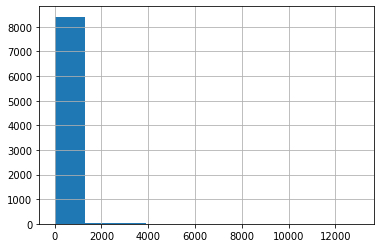

In [ ]:
df['Description'].str.len().hist();

In [ ]:
print('Minimum Length of Sentences in dataset : '+str(np.min(df['Description'].str.len())))
print('Maximum Length of Sentences in dataset : '+str(np.max(df['Description'].str.len())))
print('Mean Length of Sentences in dataset : '+str(round(np.mean(df['Description'].str.len()))))

Minimum Length of Sentences in dataset : 1.0
Maximum Length of Sentences in dataset : 13001.0
Mean Length of Sentences in dataset : 204


## Detect Language

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 4.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=aefe106be531911871f56f6b5d1f1b7bf4326b1d87a4d64035dd2b078ee40297
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df['Lang'] = df['Description'].apply(det)

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group,Lang
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no


In [ ]:
df['Lang'].value_counts()

en       7001
de        400
af        264
it        157
fr        121
sv         82
da         79
no         66
ca         61
nl         59
es         52
pl         31
pt         28
ro         17
tl         11
cy         10
sl         10
et          8
sq          7
fi          6
so          5
hr          5
tr          4
id          4
Other       4
sk          3
lt          2
sw          1
cs          1
lv          1
Name: Lang, dtype: int64

Text(0.5, 1.0, 'Description Language Codes')

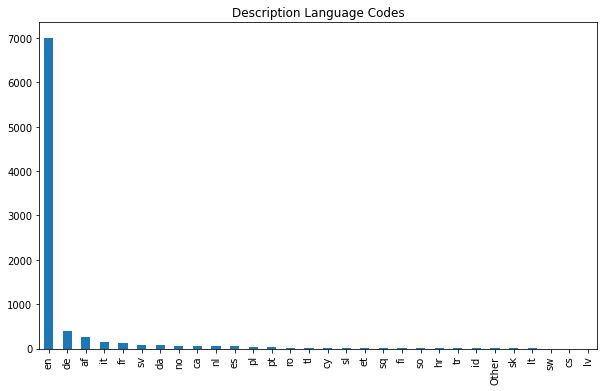

In [ ]:
top_10 = df['Lang'].value_counts()
top_10.plot(kind='bar',figsize=(10,6))
plt.title('Description Language Codes')

## Class Distribution

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

## Missing Values in Description

In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
Lang                 0
dtype: int64

In [ ]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
Lang                 0
dtype: int64

In [ ]:
df[df['Description'].isna() == True]

,Short description,Description,Caller,Assignment group,Lang
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,Other


In [ ]:
df['Description'].fillna(df['Short description'], inplace=True)

In [ ]:
 df[['Short description', 'Description']].iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Name: 4395, dtype: object

In [ ]:
df.isna().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
Lang                 0
dtype: int64

# Preprocess Data

## Remove Special Characters and Numerical Values

In [ ]:
df_en = df[df['Lang'] == 'en']

In [ ]:
import re

In [ ]:
df_en['PreProcessedText'] = df_en['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en['PreProcessedText'] = df_en['PreProcessedText'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype


## Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

## Remove Stop Words

In [ ]:
df_en['txt_wo_stopwords'] = df_en['PreProcessedText'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText,txt_wo_stopwords
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...,verified user detailsemployee manager name che...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...,received hmjdrvpbkomuaywngmailcom hello team m...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...,received eylqgodmybqkwiamgmailcom hi cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page,unable access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype,unable log engineering tool skype


## Remove all extra white spaces

In [ ]:
df_en['txt_wo_stopwords'] = df_en['txt_wo_stopwords'].apply(lambda x: re.sub(' +', ' ', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText,txt_wo_stopwords
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...,verified user detailsemployee manager name che...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...,received hmjdrvpbkomuaywngmailcom hello team m...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...,received eylqgodmybqkwiamgmailcom hi cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page,unable access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype,unable log engineering tool skype


In [ ]:
pd.DataFrame(corpus).value_counts()[:25]

received                    2269
please                      1912
yesnona                     1568
job                         1520
user                        1143
jobscheduler                 967
password                     967
monitoringtoolcompanycom     960
erp                          950
failed                       904
company                      782
issue                        768
access                       689
error                        686
site                         683
account                      681
reset                        668
sid                          641
ticket                       637
power                        636
help                         623
unable                       615
hello                        605
id                           601
system                       580
dtype: int64

In [ ]:
X = df_en.txt_wo_stopwords

In [ ]:
y=df_en['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_en['Assignment group'])
y=le.transform(df_en['Assignment group'])
y=le.transform(df_en['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))

X_train : (5273,)
X_test : (1758,)
y_train : (5273,)
y_test : (1758,)


## TFIDF

In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

11531

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(5273, 11531)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       813
           1       0.00      0.00      0.00         6
           2       0.76      0.34      0.47        38
           3       1.00      0.00      0.00         4
           4       0.60      0.57      0.58        49
           5       0.34      0.38      0.36        29
           6       0.65      0.41      0.50        27
           7       1.00      0.10      0.18        10
           8       1.00      0.00      0.00        25
           9       1.00      0.67      0.80        15
          10       0.71      0.25      0.37        20
          11       0.64      0.16      0.25        44
          12       0.61      0.48      0.53        48
          13       0.00      0.00      0.00        12
          14       1.00      0.00      0.00         7
          15       1.00      0.00      0.00         6
          16       0.33      0.14      0.20         7
          17       1.00    

## BaseLine Models

## Classification based on Description field

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

16873

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 16873)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       994
           1       1.00      0.00      0.00         8
           2       0.90      0.54      0.68        35
           3       1.00      0.00      0.00         8
           4       0.54      0.47      0.50        64
           5       0.73      0.53      0.61        36
           6       0.65      0.37      0.47        30
           7       0.50      0.10      0.17        10
           8       0.00      0.00      0.00        21
           9       0.64      0.70      0.67        20
          10       0.83      0.45      0.59        22
          11       0.67      0.15      0.24        54
          12       0.59      0.32      0.41        60
          13       1.00      0.00      0.00         9
          14       1.00      0.14      0.25         7
          15       1.00      0.25      0.40         8
          16       0.50      0.17      0.25         6
          17       0.88    

## Classification based on Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
df_data.shape

(8467, 10)

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'].astype('str').apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42, stratify=y)
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))
print('X_val : '+str(X_val.shape))
print('y_val : '+str(y_val.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

6210

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 6210)

In [ ]:
X_test_tfidf = tvect.transform(X_test)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       994
           1       1.00      0.00      0.00         8
           2       0.87      0.57      0.69        35
           3       0.50      0.12      0.20         8
           4       0.59      0.52      0.55        64
           5       0.56      0.53      0.54        36
           6       0.62      0.27      0.37        30
           7       0.33      0.10      0.15        10
           8       0.00      0.00      0.00        21
           9       0.80      1.00      0.89        20
          10       0.73      0.36      0.48        22
          11       0.52      0.20      0.29        54
          12       0.72      0.22      0.33        60
          13       1.00      0.00      0.00         9
          14       0.40      0.29      0.33         7
          15       0.50      0.25      0.33         8
          16       0.43      0.50      0.46         6
          17       0.86    

## Classification combining both Long and Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group,txt_wo_stopwords
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0,outlookreceived from: hmjdrvpb.komuaywn@gmail....
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0,cant log in to vpnreceived from: eylqgodm.ybqk...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable access hr_...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0,skype errorskype error


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'] + df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.shape

(8449, 11)

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])


In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.01, shuffle = True, random_state = 8, stratify = y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (6273,)
X_test shape: (85,)
y_train shape: (6273,)
y_test shape: (85,)
X_val shape: (2091,)
y val shape: (2091,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()


In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

20872

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(6273, 20872)

In [ ]:
X_val_tfidf = tvect.transform(X_val)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm


In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_val_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.97      0.80      1001
           1       1.00      0.00      0.00         4
           2       0.82      0.38      0.52        37
           3       1.00      0.00      0.00         7
           4       0.70      0.43      0.53        74
           5       0.43      0.54      0.48        24
           6       0.69      0.27      0.39        33
           7       1.00      0.00      0.00         9
           8       1.00      0.00      0.00        21
           9       0.88      1.00      0.94        23
          10       0.53      0.44      0.48        18
          11       0.55      0.22      0.31        51
          12       0.73      0.39      0.51        57
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.50      0.09      0.15        11
          16       0.17      0.17      0.17         6
          17       0.84    

## Prediction on Test Data

In [ ]:
X_test

1608    wifi not working in pennsylvania (wireless iss...
4631    vpn access pc name : aidl8912285  user id : th...
5273    Trofner function does not work.no trifner func...
5018    HostName_1201 plm serverlet someone dsccache s...
394     please assist thrys hsdbdtt in logging into re...
                              ...                        
2028                         account unlockaccount unlock
3082    access to teams drive - folder sox self-assess...
2826    Problems with CompanyGuest \ BCTYPMJW CBHNXAFZ...
2096    job Job_549 failed in job_scheduler at: 10/06/...
5066         battery charging issuebattery charging issue
Name: txt_wo_stopwords, Length: 85, dtype: object

In [ ]:
y_pred=clf.predict(X_test_tfidf)

In [ ]:
X_test.to_numpy()[0]

'wifi not working in pennsylvania (wireless issue at waynesboro)wifi working pennsylvania access point working . work stoppage issue. tried calling christgry twice ..reached warehouse_tool mail. left brief message. dialed again. able reach christgry .'

In [ ]:
y_pred[1]

0

In [ ]:
y_test[1]

0

In [ ]:
le.inverse_transform([0])

array(['GRP_0'], dtype=object)